In [1]:
import numpy as np
import matplotlib.pyplot as plt
from procesadoDatosDemandaString import procesar_datos_string 
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score

In [2]:
datos = procesar_datos_string()
datos
labels = list(datos.index)

Archivo donde están los datos de la demanda (sin extensión): demanda


In [3]:
datos = datos.to_numpy()

In [4]:
datos = normalize(datos)

In [5]:
len(datos[0])

24

In [6]:
score_list = []
maximo = (0,0)
for x in range(2,20):
    clusterer = KMeans(n_clusters=x, random_state=1)
    cluster_labels = clusterer.fit_predict(datos)
    score = silhouette_score(datos, cluster_labels)
    score_list.append(score)
    if score > maximo[1]:
        maximo = (x, score)

El maximo se obtiene en el nodo 2 con una puntuacion de 0.46844713925624687


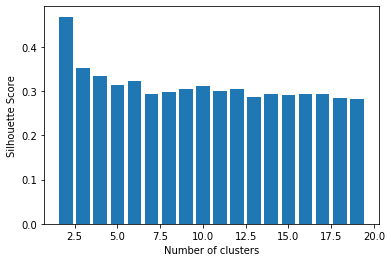

In [7]:
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.bar([x for x in range(2, 20, 1)], score_list)
print("El maximo se obtiene en el nodo {} con una puntuacion de {}".format(maximo[0], maximo[1]))

In [8]:
clusterer = KMeans(n_clusters=6, random_state=1)
cluster_labels = clusterer.fit_predict(datos)

In [9]:
dia_cluster = {}
for (i, j) in enumerate(labels):
    dia_cluster[j] = cluster_labels[i]
dia_cluster

dic_cluster = {"0":0, "1":0, "2":0, "3":0, "4":0, "5":0}
for j in cluster_labels:
    if j == 0:
        dic_cluster["0"]+=1
    elif j == 1:
        dic_cluster["1"]+=1
    elif j == 2:
        dic_cluster["2"]+=1
    elif j == 3:
        dic_cluster["3"]+=1
    elif j == 4:
        dic_cluster["4"]+=1
    elif j == 5:
        dic_cluster["5"]+=1

dic_cluster


{'0': 89, '1': 282, '2': 106, '3': 146, '4': 211, '5': 261}

In [10]:
festivos_2017 = ['20170101',
                '20170106',
                '20170202',
                '20170228',
                '20170301',
                '20170319',
                '20170326',
                '20170409',
                '20170410',
                '20170411',
                '20170412',
                '20170413',
                '20170414',
                '20170415',
                '20170416',
                '20170417',
                '20170501',
                '20170515',
                '20170605',
                '20170615',
                '20170813',
                '20170815',
                '20171012',
                '20171101',
                '20171206',
                '20171208',
                '20171225']

festivos_2018 = ['20180101',
                '20180106',
                '20180202',
                '20180211',
                '20180228',
                '20180301',
                '20180319',
                '20180409',
                '20180410',
                '20180411',
                '20180412',
                '20180413',
                '20180414',
                '20180415',
                '20180416',
                '20180417',
                '20180501',
                '20180515',
                '20180605',
                '20180615',
                '20180813',
                '20180815',
                '20181012',
                '20181101',
                '20181206',
                '20181208',
                '20181225']

festivos_2019 = ['20190101',
                '20190106',
                '20190202',
                '20190211',
                '20190228',
                '20190301',
                '20190319',
                '20190414',
                '20190415',
                '20190416',
                '20190417',
                '20190418',
                '20190419',
                '20190420',
                '20190421',
                '20190422',
                '20190501',
                '20190515',
                '20190620',
                '20190725',
                '20190815',
                '20191012',
                '20191101',
                '20191206',
                '20191208',
                '20191225']

festivos = festivos_2017 + festivos_2018 + festivos_2019
len(festivos)

80

In [11]:
# Para dias festivos y no festivos
cluster1 = 0
cluster2 = 0
cluster3 = 0
cluster4 = 0
cluster5 = 0
cluster6 = 0
for i in dia_cluster:
    if i in festivos and dia_cluster[i]==0:
        cluster1+=1
    elif i in festivos and dia_cluster[i]==1:
        cluster2+=1
    elif i in festivos and dia_cluster[i]==2:
        cluster3+=1
    elif i in festivos and dia_cluster[i]==3:
        cluster4+=1
    elif i in festivos and dia_cluster[i]==4:
        cluster5+=1
    elif i in festivos and dia_cluster[i]==5:
        cluster6+=1
print("En el cluster 1: ", cluster1)
print("En el cluster 2: ", cluster2)
print("En el cluster 3: ", cluster3)
print("En el cluster 4: ", cluster4)
print("En el cluster 5: ", cluster5)
print("En el cluster 6: ", cluster6)

En el cluster 1:  16
En el cluster 2:  10
En el cluster 3:  16
En el cluster 4:  12
En el cluster 5:  5
En el cluster 6:  21


In [12]:
# Dias de verano

junio_2017 = ["201706" +str(x).zfill(2) for x in range(21,31)]
julio_2017 = ["201707" + str(x).zfill(2) for x in range(1,32)]
agosto_2017 = ["201708" + str(x).zfill(2) for x in range(1,32)]
septiembre_2017 = ["201709" + str(x).zfill(2) for x in range(1,23)]

lista_verano = junio_2017 + julio_2017 + agosto_2017 + septiembre_2017

junio_2018 = ["201806" +str(x).zfill(2) for x in range(21,31)]
julio_2018 = ["201807" + str(x).zfill(2) for x in range(1,32)]
agosto_2018 = ["201808" + str(x).zfill(2) for x in range(1,32)]
septiembre_2018 = ["201809" + str(x).zfill(2) for x in range(1,24)]

lista_verano = lista_verano + junio_2018 + julio_2018 + agosto_2018 + septiembre_2018

junio_2019 = ["201906" +str(x).zfill(2) for x in range(21,31)]
julio_2019 = ["201907" + str(x).zfill(2) for x in range(1,32)]
agosto_2019 = ["201908" + str(x).zfill(2) for x in range(1,32)]
septiembre_2019 = ["201909" + str(x).zfill(2) for x in range(1,24)]

lista_verano = lista_verano + junio_2019 + julio_2019 + agosto_2019 + septiembre_2019

len(lista_verano)

284

In [13]:
# Para dias de verano
cluster1 = 0
cluster2 = 0
cluster3 = 0
cluster4 = 0
cluster5 = 0
cluster6 = 0
for i in dia_cluster:
    if i in lista_verano and dia_cluster[i]==0:
        cluster1+=1
    elif i in lista_verano and dia_cluster[i]==1:
        cluster2+=1
    elif i in lista_verano and dia_cluster[i]==2:
        cluster3+=1
    elif i in lista_verano and dia_cluster[i]==3:
        cluster4+=1
    elif i in lista_verano and dia_cluster[i]==4:
        cluster5+=1
    elif i in lista_verano and dia_cluster[i]==5:
        cluster6+=1
print("En el cluster 1: ", cluster1)
print("En el cluster 2: ", cluster2)
print("En el cluster 3: ", cluster3)
print("En el cluster 4: ", cluster4)
print("En el cluster 5: ", cluster5)
print("En el cluster 6: ", cluster6)

En el cluster 1:  0
En el cluster 2:  3
En el cluster 3:  53
En el cluster 4:  33
En el cluster 5:  177
En el cluster 6:  18


In [14]:
# Dias de invierno

diciembre = ["201712" +str(x).zfill(2) for x in range(21,32)]
enero = ["201801" + str(x).zfill(2) for x in range(1,32)]
febrero = ["201802" + str(x).zfill(2) for x in range(1,29)]
marzo = ["201803" + str(x).zfill(2) for x in range(1,21)]

lista_invierno = diciembre + enero + febrero + marzo

diciembre = ["201812" +str(x).zfill(2) for x in range(21,32)]
enero = ["201901" + str(x).zfill(2) for x in range(1,32)]
febrero = ["201902" + str(x).zfill(2) for x in range(1,29)]
marzo = ["201903" + str(x).zfill(2) for x in range(1,21)]

lista_invierno = lista_invierno + diciembre + enero + febrero + marzo

diciembre = ["201912" +str(x).zfill(2) for x in range(22,31)]

lista_invierno = lista_invierno + diciembre

len(lista_invierno)

189

In [15]:
# Para dias de invierno
cluster1 = 0
cluster2 = 0
cluster3 = 0
cluster4 = 0
cluster5 = 0
cluster6 = 0
for i in dia_cluster:
    if i in lista_invierno and dia_cluster[i]==0:
        cluster1+=1
    elif i in lista_invierno and dia_cluster[i]==1:
        cluster2+=1
    elif i in lista_invierno and dia_cluster[i]==2:
        cluster3+=1
    elif i in lista_invierno and dia_cluster[i]==3:
        cluster4+=1
    elif i in lista_invierno and dia_cluster[i]==4:
        cluster5+=1
    elif i in lista_invierno and dia_cluster[i]==5:
        cluster6+=1
print("En el cluster 1: ", cluster1)
print("En el cluster 2: ", cluster2)
print("En el cluster 3: ", cluster3)
print("En el cluster 4: ", cluster4)
print("En el cluster 5: ", cluster5)
print("En el cluster 6: ", cluster6)

En el cluster 1:  37
En el cluster 2:  100
En el cluster 3:  0
En el cluster 4:  23
En el cluster 5:  0
En el cluster 6:  29


In [16]:
lista_verano_invierno = lista_verano + lista_invierno

# Para dias de verano o invierno

cluster1 = 0
cluster2 = 0
cluster3 = 0
cluster4 = 0
cluster5 = 0
cluster6 = 0
for i in dia_cluster:
    if i in lista_verano_invierno and dia_cluster[i]==0:
        cluster1+=1
    elif i in lista_verano_invierno and dia_cluster[i]==1:
        cluster2+=1
    elif i in lista_verano_invierno and dia_cluster[i]==2:
        cluster3+=1
    elif i in lista_verano_invierno and dia_cluster[i]==3:
        cluster4+=1
    elif i in lista_verano_invierno and dia_cluster[i]==4:
        cluster5+=1
    elif i in lista_verano_invierno and dia_cluster[i]==5:
        cluster6+=1
print("En el cluster 1: ", cluster1)
print("En el cluster 2: ", cluster2)
print("En el cluster 3: ", cluster3)
print("En el cluster 4: ", cluster4)
print("En el cluster 5: ", cluster5)
print("En el cluster 6: ", cluster6)

dic_cluster

En el cluster 1:  37
En el cluster 2:  103
En el cluster 3:  53
En el cluster 4:  56
En el cluster 5:  177
En el cluster 6:  47


{'0': 89, '1': 282, '2': 106, '3': 146, '4': 211, '5': 261}